In [1]:
import numpy as np
import pandas as pd
import statistics as stat
import scipy
import math as m

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
years = ('FY21A', 'FY22E', 'FY23F', 'FY24F', 'FY25F', 'FY26F', 'FY27F')
sales = pd.Series(index = years)
#print(sales)

sales['FY21A'] =  21101 
#print(sales)

/tmp/ipykernel_32/1746477868.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sales = pd.Series(index = years)


In [3]:
sales_growth_rate = [0.7 for i in range(6)] # Red Fleg 1
#print(sales_growth_dist)

for year in range(1, 7): # 1, 2, 3, 4, 5, 6
    sales[year] = (sales[year - 1] * (1 + sales_growth_rate[year - 1])).round(2)
    
#print(sales)

In [4]:
ebitda_margin = 0.7 # Red Fleg 2
depr_margin = 0.3
cost_of_capital = 0.137 # Red Fleg 3
terminal_growth = 0.02 # Red Fleg 4
tax = 0.15

In [5]:
#np.random.seed(2023)

def dcf():
    
    sales_growth_random = np.random.normal(loc = sales_growth_rate[0], scale = 0.4, size = 1)
    ebitda_margin_random = np.random.normal(loc = ebitda_margin, scale = 0.1, size = 1)
    capex_percent = np.random.choice([0.5 * depr_margin, depr_margin, 1.5 * depr_margin, 2 * depr_margin, 2.5 * depr_margin], size = 1, p = [0.2, 0.3, 0.15, 0.2, 0.15])
    
    terminal_growth_random = np.random.uniform(terminal_growth - 0.02, terminal_growth + 0.02, size = 1)
    cost_of_capital_random = np.random.uniform(cost_of_capital - 0.1, cost_of_capital + 0.1, size = 1)
    
    for year in range(1, 7):
        sales[year] = sales[year - 1] * (1 + sales_growth_random)
        
    ebitda = sales * ebitda_margin_random
    # print(ebitda)
    
    depreciation = (sales * depr_margin)
    ebit = ebitda - depreciation
    # print(ebit)
    
    tax_payment = ebit * tax_rate
    tax_payment = tax_payment.apply(lambda x: max(x, 0))
    
    gross_fcff = ebit - tax_payment
    # print(gross_fcff)
    
    #capex_percent = depr_margin
    capex_estimate = - (sales * capex_percent)
    
    
    nwc_estimate = pd.Series((1802, 1576, 2580, 5131, 47385, 38844, 13746), index = years)
    change_in_nwc = (nwc_estimate.shift(1) - nwc_estimate)[1:] 
    
    free_cash_flow = gross_fcff + depreciation + capex_estimate - change_in_nwc

    terminal_value = (free_cash_flow[-1] * terminal_growth_random) / (cost_of_capital - terminal_growth_random)
    free_cash_flow[-1] += terminal_value
    discount_factors = [(1 / (1 + cost_of_capital)) ** i for i in range (1,7)]
    enterprise_value = sum(free_cash_flow[1:] * discount_factors)
    
    return enterprise_value

dcf()

NameError: name 'tax_rate' is not defined

In [6]:
output_distribution = list()

for i in range(10000):
    output_distribution.appen(dcf())
    
output_distribution = np.array(output_distribution)

output_distribution.mean(), output_distribution.std()

AttributeError: 'list' object has no attribute 'appen'

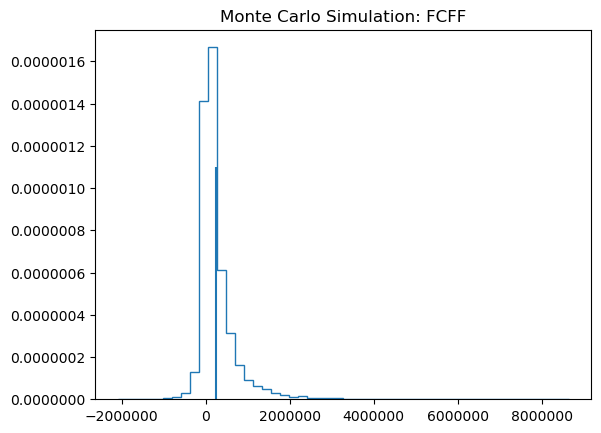

In [7]:
plt.style.use('_classic_test_patch')

plt.hist(output_distribution, density = True, bins = 50, histtype = 'step')
plt.ticklabel_format(style='plain')
plt.vlines(x = output_distribution.mean(), ymin = 0, ymax = 0.0000011)
plt.title('Monte Carlo Simulation: FCFF')

plt.show()